<a href="https://colab.research.google.com/github/MennatullahOsman/Denoising_Dirty_Documents/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
import os
import glob 
import pickle
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import imgaug as ia
from imgaug import augmenters as iaa
import cv2

In [ ]:
for filename in os.listdir("/content/drive/My Drive/denoising-dirty-documents"):
    if filename.endswith("zip"): 
        !unzip "$filename"
        !rm -rf "$filename"

In [ ]:
base_dir = '/content/drive/My Drive/denoising-dirty-documents/'
train_dir = os.path.join(base_dir, 'train/')
test_dir = os.path.join(base_dir, 'test/')
train_cleaned_dir = os.path.join(base_dir, 'train_cleaned/')

IMG_HEIGHT = 420
IMG_WIDTH = 540

In [ ]:
def loadImages(path,toFind):
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.png')])
    for i in range(0,len(image_files)):
      image_files[i] = int(image_files[i][image_files[i].find(toFind)+len(toFind) : image_files[i].find('.')])

    image_files.sort()
    return image_files

In [ ]:
def processingData(path):
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = np.asarray(img, dtype="float32")
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img/255.0
    img = np.reshape(img,(IMG_HEIGHT,IMG_WIDTH,1))
    return img

In [ ]:
loaded_train_img = loadImages(train_dir,'train/')
loaded_train_cleaned_img =loadImages(train_cleaned_dir,'train_cleaned/')
loaded_test_img = loadImages(test_dir,'test/')

processed_train_img = []
processed_train_cleaned_img = []
processed_test_img = []

for img in loaded_train_img:
    processed_train_img.append(processingData(os.path.join(train_dir, str(img)+'.png')))

for img in loaded_train_cleaned_img:
    processed_train_cleaned_img.append(processingData(os.path.join(train_cleaned_dir, str(img)+'.png')))

for img in loaded_test_img:
    processed_test_img.append(processingData(os.path.join(test_dir, str(img)+'.png')))

train = np.array(processed_train_img)
train_cleaned = np.array(processed_train_cleaned_img)
test = np.array(processed_test_img)

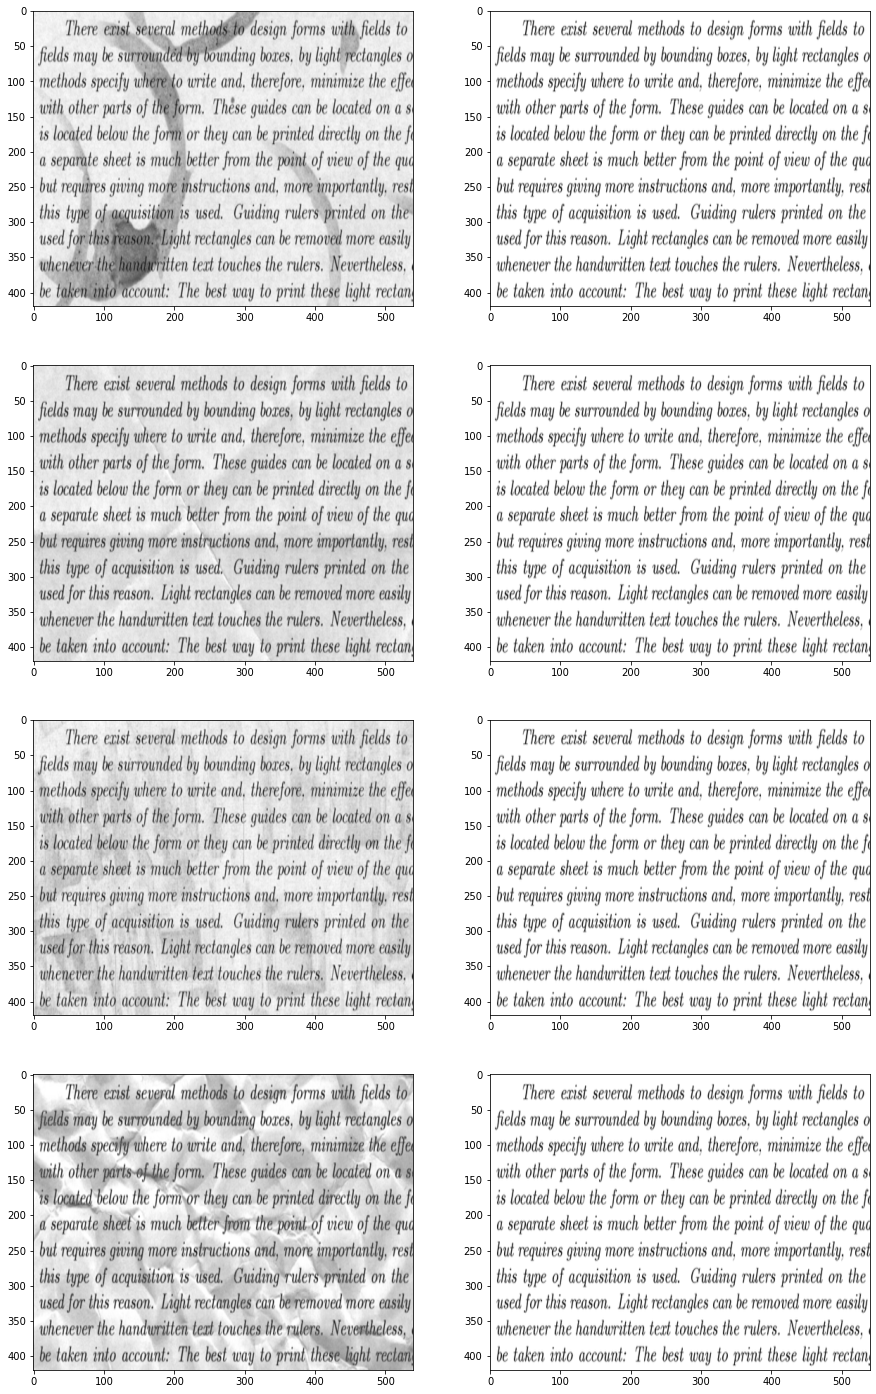

In [ ]:
plt.figure(figsize=(15,25))
for i in range(0,8,2):
    plt.subplot(4,2,i+1)
    plt.imshow(train[i][:,:,0], cmap='gray')
    
    plt.subplot(4,2,i+2)
    plt.imshow(train_cleaned[i][:,:,0], cmap='gray')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train, train_cleaned, test_size=0.3, random_state=42) 

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(100, 420, 540, 1)
(100, 420, 540, 1)
(44, 420, 540, 1)
(44, 420, 540, 1)


In [ ]:
ia.seed(5)
seq1 = iaa.Sequential([
    iaa.Fliplr(1), # horizontal flips 
])

seq2 = iaa.Sequential([
    iaa.Flipud(1), # vertical flips 
])

seq3 = iaa.Sequential([
    iaa.Affine(
        rotate = 45)
])

seq4 = iaa.Sequential([
    iaa.Affine(
        scale={"x": (1.2), "y": (1.2)})
])

seq5 = iaa.Sequential([
    iaa.Affine(
        shear= 16)
])

In [ ]:
x_train_aug = x_train.copy()
x_train_aug = np.append(x_train_aug, np.array(seq1(images = x_train_aug)), axis = 0)
x_train_aug = np.append(x_train_aug, np.array(seq2(images = x_train_aug)), axis = 0)
x_train_aug = np.append(x_train_aug, np.array(seq3(images = x_train_aug)), axis = 0)
x_train_aug = np.append(x_train_aug, np.array(seq4(images = x_train_aug)), axis = 0)

print(x_train_aug.shape)

(1600, 420, 540, 1)


In [ ]:
y_train_aug = y_train.copy()

y_train_aug = np.append(y_train_aug, np.array(seq1(images = y_train_aug)), axis = 0)
y_train_aug = np.append(y_train_aug, np.array(seq2(images = y_train_aug)), axis = 0)
y_train_aug = np.append(y_train_aug, np.array(seq3(images = y_train_aug)), axis = 0)
y_train_aug = np.append(y_train_aug, np.array(seq4(images = y_train_aug)), axis = 0)

print(y_train_aug.shape)

(1600, 420, 540, 1)


In [ ]:
os.chdir('/content/drive/My Drive/denoising-dirty-documents/pickle_data')

pickle_out = open("x_train.pickle", "wb") 
pickle.dump(x_train, pickle_out) 
pickle_out.close()

pickle_out = open("y_train.pickle", "wb") 
pickle.dump(y_train, pickle_out) 
pickle_out.close()

pickle_out = open("x_val.pickle", "wb") 
pickle.dump(x_val, pickle_out) 
pickle_out.close()

pickle_out = open("y_val.pickle", "wb") 
pickle.dump(y_val, pickle_out) 
pickle_out.close()

pickle_out = open("test.pickle", "wb") 
pickle.dump(test, pickle_out) 
pickle_out.close()

pickle_out = open("x_train_aug.pickle", "wb") 
pickle.dump(x_train_aug, pickle_out) 
pickle_out.close()

pickle_out = open("y_train_aug.pickle", "wb") 
pickle.dump(y_train_aug, pickle_out) 
pickle_out.close()